In [1]:
# initializing

img_rows, img_cols = 48, 48
batch_size = 500

train_data_dir = './emo/Training'
validation_data_dir = './emo/PublicTest'

In [2]:
#processing image
import keras
from keras.preprocessing.image import ImageDataGenerator

#for train
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      zoom_range=0.2,
      horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')
#for validation
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

C:\Users\Fire Bender\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


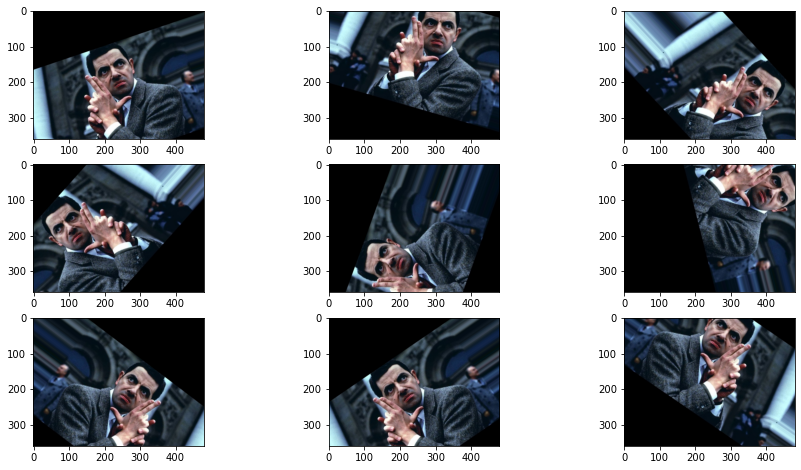

In [3]:
from numpy import expand_dims

from tensorflow.keras.utils import load_img,img_to_array
#from keras.preprocessing.image import 
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('bean.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90,horizontal_flip=True,width_shift_range=[-100,50])#width_shift_range=[-100,50],horizontal_flip=True,rotation_range=90)#height_shift_range=0.3,
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
pyplot.figure(figsize=(15,8))
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data    
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [12]:
print(validation_generator.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [19]:
# Create the model
from keras.models import Sequential
from keras.layers import Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(48,48,1)))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(10, 10), activation='relu'))

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 1, 1, 7)           89607     
_________________________________________________________________
flatten_7 (Flatten)          (None, 7)                

In [9]:
#saving each epoch of model in hdf5 
import os
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
filepath = os.path.join("./emo/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=False,
                                             mode='max')
callbacks = [checkpoint]
# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
nb_train_samples = 28709
nb_validation_samples = 3589
epochs =100
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
56/56 [==============================] - 865s 15s/step - loss: 1.9709 - accuracy: 0.1475 - val_loss: 1.9663 - val_accuracy: 0.1635

Epoch 00001: saving model to ./emo/model_v6_1.hdf5
Epoch 2/100
56/56 [==============================] - 418s 7s/step - loss: 1.9656 - accuracy: 0.1593 - val_loss: 1.9635 - val_accuracy: 0.1739

Epoch 00002: saving model to ./emo/model_v6_2.hdf5
Epoch 3/100
56/56 [==============================] - 409s 7s/step - loss: 1.9611 - accuracy: 0.1662 - val_loss: 1.9585 - val_accuracy: 0.1784

Epoch 00003: saving model to ./emo/model_v6_3.hdf5
Epoch 4/100
56/56 [==============================] - 461s 8s/step - loss: 1.9572 - accuracy: 0.1664 - val_loss: 1.9559 - val_accuracy: 0.1820

Epoch 00004: saving model to ./emo/model_v6_4.hdf5
Epoch 5/100
56/56 [==============================] - 442s 8s/step - loss: 1.9519 - accuracy: 0.1721 - val_loss: 1.9524 - val_accuracy: 0.1963

Epoch 00005: saving model to ./emo/model_v6_5.hdf5
Epoch 6/100
56/56 [==========

56/56 [==============================] - 428s 8s/step - loss: 1.6248 - accuracy: 0.3694 - val_loss: 1.5199 - val_accuracy: 0.4170

Epoch 00043: saving model to ./emo/model_v6_43.hdf5
Epoch 44/100
56/56 [==============================] - 443s 8s/step - loss: 1.6292 - accuracy: 0.3686 - val_loss: 1.5623 - val_accuracy: 0.4114

Epoch 00044: saving model to ./emo/model_v6_44.hdf5
Epoch 45/100
56/56 [==============================] - 422s 8s/step - loss: 1.6219 - accuracy: 0.3709 - val_loss: 1.5449 - val_accuracy: 0.4228

Epoch 00045: saving model to ./emo/model_v6_45.hdf5
Epoch 46/100
56/56 [==============================] - 456s 8s/step - loss: 1.6271 - accuracy: 0.3746 - val_loss: 1.5426 - val_accuracy: 0.4134

Epoch 00046: saving model to ./emo/model_v6_46.hdf5
Epoch 47/100
56/56 [==============================] - 429s 8s/step - loss: 1.6076 - accuracy: 0.3795 - val_loss: 1.4971 - val_accuracy: 0.4222

Epoch 00047: saving model to ./emo/model_v6_47.hdf5
Epoch 48/100
56/56 [=============

56/56 [==============================] - 419s 7s/step - loss: 1.5240 - accuracy: 0.4222 - val_loss: 1.4390 - val_accuracy: 0.4514

Epoch 00085: saving model to ./emo/model_v6_85.hdf5
Epoch 86/100
56/56 [==============================] - 436s 8s/step - loss: 1.5119 - accuracy: 0.4230 - val_loss: 1.4021 - val_accuracy: 0.4508

Epoch 00086: saving model to ./emo/model_v6_86.hdf5
Epoch 87/100
56/56 [==============================] - 415s 7s/step - loss: 1.5188 - accuracy: 0.4239 - val_loss: 1.4283 - val_accuracy: 0.4556

Epoch 00087: saving model to ./emo/model_v6_87.hdf5
Epoch 88/100
56/56 [==============================] - 383s 7s/step - loss: 1.5152 - accuracy: 0.4219 - val_loss: 1.3995 - val_accuracy: 0.4586

Epoch 00088: saving model to ./emo/model_v6_88.hdf5
Epoch 89/100
56/56 [==============================] - 384s 7s/step - loss: 1.5138 - accuracy: 0.4221 - val_loss: 1.4899 - val_accuracy: 0.4475

Epoch 00089: saving model to ./emo/model_v6_89.hdf5
Epoch 90/100
56/56 [=============

KeyboardInterrupt: 

In [4]:
#just to display the labels in validation
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3589 images belonging to 7 classes.
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Fire Bender\AppData\Local\Temp\ipykernel_10072\1358410760.py:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
883  : readings


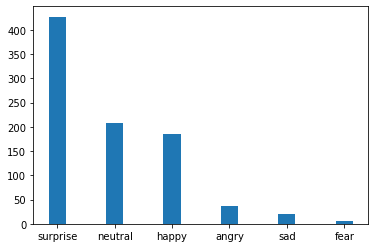

In [9]:
from datetime import datetime as dt
from pandas import DataFrame as df
import pandas as pd
import cv2
import numpy as np
from keras.models import load_model
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from pygame import mixer
import random
import os
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier = load_model("./emo/model_v6_576.hdf5")

i=1
j=0

pat=''
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    _, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is():
        cv2.imshow('emotion', frame)
        #print('empty')
    
    else:
        for (x,y,w,h) in faces:
            j+=1
            
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            #reshpaing the gray image
            roi_gray = cv2.resize(roi_gray, (48, 48))
            #converting face to np array
            roi = roi_gray.astype("float") / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)
            
            preds = classifier.predict(roi)[0]
            label = class_labels[preds.argmax()]  

            cv2.putText(frame, label, (20,60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
            cv2.imshow('emotion', frame)
            
            x=dt.now()
            f=x.strftime("%d-%m-%y   %H:%M:%S")
            #print(label,'--',f)
            c=dt.strptime(f,"%d-%m-%y   %H:%M:%S")
            
           
            #converting into dataframe
            data={'emotion':[label],'time':[c]}
            dsf=df(data,columns=['emotion','time'])
            if i==1:
                with open('my_csv.csv', 'w') as fo:
                    dsf.to_csv(fo)
                i+=1
            else:
                with open('my_csv.csv', 'a') as fo:
                    dsf.to_csv(fo,header=False)
    #opening csv to get max label
    dop=pd.read_csv('my_csv.csv')
    maxi=dop['emotion'].max()
    
    

    pa='music'
    r=random.randint(1,2)
    #maxi='happy'
    mixer.init()
    if(not(mixer.music.get_busy()) and j>20):
        path=os.path.join(pa,maxi,str(r)+'.mp3')
        
        mixer.music.load(path)
        mixer.music.play()

    
    if cv2.waitKey(2)&0xFF==ord('a'):
        mixer.music.fadeout(2000)
        #mixer.stop()
        df=pd.read_csv('my_csv.csv')
        print(df.emotion.count(),' : readings')
        #print(df.emotion.unique())
        ls=df.emotion.value_counts()
        dict(ls)

        lab=list(ls.keys())
        val=list(ls.values)
        plt.bar(lab,val,align='center',width=0.3)
        break
        
cap.release()
cv2.destroyAllWindows()

<>:41: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:41: SyntaxWarning: "is" with a literal. Did you mean "=="?


1/1 [==============================] - 0s 96ms/step


C:\Users\Fire Bender\AppData\Local\Temp\ipykernel_46684\3687837948.py:41: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


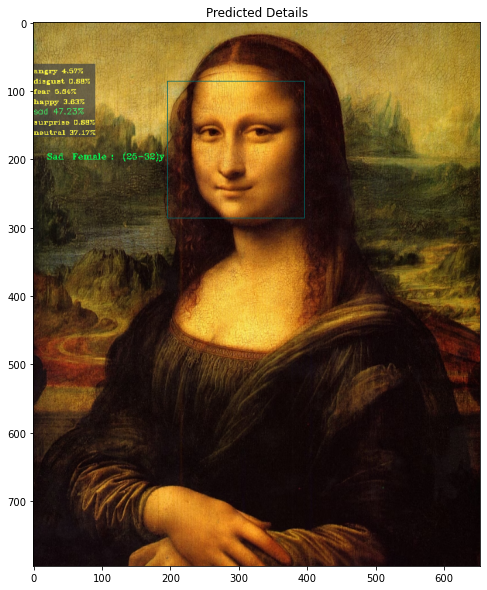

In [54]:
#image processer
from datetime import datetime as dt
from pandas import DataFrame as df
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
#from pygame import mixer
import random
import os
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier = tf.keras.models.load_model("./emo/model_v6_576.hdf5")

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

#age part
#ageList=['(0-2)', '(4-6)', '(8-12)', '(13-24)', '(25-32)', '(38-43)', '(44-50)', '(60-100)']
ageList=['(0-2)', '(4-6)', '(8-12)', '(13-24)', '(25-32)', '(38-43)', '(44-50)', '(60-100)']
ageProto="deploy_age.prototxt"
ageModel="age_net.caffemodel"
ageNet=cv2.dnn.readNet(ageModel,ageProto)


#Gender part
genderList=['Male','Female']
genderProto="deploy_gender.prototxt"
genderModel="gender_net.caffemodel"
genderNet=cv2.dnn.readNet(genderModel,genderProto)

i=1
j=0

pat=''
image = cv2.cvtColor(cv2.imread('mona.png'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is():
        #cv2.imshow('emotion', image)
        print('empty')

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0, 102, 102),1)
    roi_gray = gray[y:y+h, x:x+w]
    #reshpaing the gray image
    roi_gray = cv2.resize(roi_gray, (48, 48))
    #converting face to np array
    roi = roi_gray.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    #preds = classifier.predict(roi)[0]
    #lable = class_labels[preds.argmax()]
    
    preds = classifier.predict(roi)
    
    max_index=np.argmax(preds[0])
    #print(max_index)
    lable=emotions[max_index]
    
    
    #age part
    MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
    blob=cv2.dnn.blobFromImage(image, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age=ageList[agePreds[0].argmax()]
    #print(age)
    
    #Gender
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]

#        print(f'Gender: {gender}')
    
    emotion = ""
    
    
    overlay = image.copy()
    opacity = 0.3
    cv2.rectangle(image,(1,y-25),(90,y+81),(64,64,64),cv2.FILLED)
    cv2.addWeighted(overlay, opacity, image, 1 - opacity, 0, image)#helps to blend image
    for i in range(len(preds[0])):
        emotion = "%s %s%s" % (emotions[i], round(preds[0][i]*100, 2), '%')
        
        if emotions[i] == lable:
            color = (66, 245, 105)
            cv2.putText(image, emotion, (0, int(y-12+i*15)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)
        else:
            color = (245, 239, 66)
            cv2.putText(image, emotion, (0, int(y-12+i*15)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, color, 1)
    
    #print(f'Age: {age[1:-1]} years')
    

    
    
    text="{}  {} :  {}y".format(lable.title(),gender, age)
    cv2.putText(image, text, (20,200) , cv2.FONT_HERSHEY_TRIPLEX,.4, (0, 255, 85), 1)
    
    #cv2.imshow('emotion', image)
    if cv2.waitKey(2)&0xFF==ord('a'):
        cv2.destroyAllWindows()
        break
plt.figure(figsize=(10, 10))
plt.title("Predicted Details")
plt.imshow(image)


In [5]:
#video processer
from datetime import datetime as dt
from pandas import DataFrame as df
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
#from pygame import mixer
import random
import os
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier = tf.keras.models.load_model("./emo/model_v6_576.hdf5")

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

#age part
#ageList=['(0-2)', '(4-6)', '(8-12)', '(13-24)', '(25-32)', '(38-43)', '(44-50)', '(60-100)']
ageList=['(0-2)', '(4-6)', '(8-12)', '(13-24)', '(25-32)', '(38-43)', '(44-50)', '(60-100)']
ageProto="deploy_age.prototxt"
ageModel="age_net.caffemodel"
ageNet=cv2.dnn.readNet(ageModel,ageProto)


#Gender part
genderList=['Female','Male']
genderProto="deploy_gender.prototxt"
genderModel="gender_net.caffemodel"
genderNet=cv2.dnn.readNet(genderModel,genderProto)

i=1
j=0

pat=''

cap = cv2.VideoCapture(0)

while(True):
    ret, img = cap.read()
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is():
            #cv2.imshow('emotion', image)
            print('empty')

    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0, 102, 102),1)
        roi_gray = gray[y:y+h, x:x+w]
        #reshpaing the gray image
        roi_gray = cv2.resize(roi_gray, (48, 48))
        #converting face to np array
        roi = roi_gray.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        #preds = classifier.predict(roi)[0]
        #lable = class_labels[preds.argmax()]

        preds = classifier.predict(roi)

        max_index=np.argmax(preds[0])
        #print(max_index)
        lable=emotions[max_index]


        #age part
        MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
        blob=cv2.dnn.blobFromImage(image, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
        ageNet.setInput(blob)
        agePreds=ageNet.forward()
        age=ageList[agePreds[0].argmax()]
        #print(age)

        #Gender
        genderNet.setInput(blob)
        genderPreds=genderNet.forward()
        gender=genderList[genderPreds[0].argmax()]

        #        print(f'Gender: {gender}')

        emotion = ""


        overlay = image.copy()
        opacity = 0.3
        cv2.rectangle(image,(1,y-25),(90,y+81),(64,64,64),cv2.FILLED)
        cv2.addWeighted(overlay, opacity, image, 1 - opacity, 0, image)#helps to blend image
        for i in range(len(preds[0])):
            emotion = "%s %s%s" % (emotions[i], round(preds[0][i]*100, 2), '%')

            if emotions[i] == lable:
                color = (66, 245, 105)
                cv2.putText(image, emotion, (0, int(y-12+i*15)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)
            else:
                color = (245, 239, 66)
                cv2.putText(image, emotion, (0, int(y-12+i*15)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, color, 1)

        #print(f'Age: {age[1:-1]} years')


        text="{}  {} :  {}y".format(lable.title(),gender, age)
        cv2.putText(image, text, (20,200) , cv2.FONT_HERSHEY_TRIPLEX,.4, (0, 255, 85), 1)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        cv2.imshow('Scanning', image)
    if cv2.waitKey(1)&0xFF==ord('q'):
        break
            

cap.release()
cv2.destroyAllWindows()


<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Fire Bender\AppData\Local\Temp\ipykernel_34100\3803637928.py:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
empty
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
empty
1/1 [==============================] - 0s 19ms/step
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
empty
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step
empty
empty
empty
1/1 [==============================] - 0s 16ms/step
empty
empty
empty
empty
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step
empty
empty
empty
1/1 [==============================] - 0s 19ms/step
empty
empty
empty
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 17ms/step
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0

1/1 [==============================] - 0s 17ms/step
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 18ms/step
empty
empty
empty
1/1 [==============================] - 0s 20ms/step
empty
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step
empty
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step
empty
1/1 [==============================] - 0s 25ms/step
empty
1/1 [==============================] - 0s 21ms/step
empty
empty
empty
empty
empty
empty
empty
empty
empty
1/1 [==============================] - 0s 20ms/step
empty
empty
empty
1/1 [==============================] - 0s 20ms/step
empty
empty
1/1 [==============================] - 0s 19ms/step
empty
1/1 [==============================] - 0s 20ms/step
